In [33]:
from darts import TimeSeries
from process_data import process_file_to_series
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler


scaler = Scaler()

series = process_file_to_series("data.txt")
train, val = series.split_after(0.75)
train = scaler.fit_transform(train)

model = NBEATSModel(input_chunk_length=24, output_chunk_length=12)

model.fit(train, epochs=100, verbose=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 7.2 M 
---------------------------------------------------
7.1 M     Trainable params
2.1 K     Non-trainable params
7.2 M     Total params
28.603    Total estimated model params size (MB)


Epoch 99: 100%|██████████| 63/63 [00:03<00:00, 19.34it/s, train_loss=0.00087] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 63/63 [00:03<00:00, 19.34it/s, train_loss=0.00087]


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]
Error Mean:
 component
data0    5.116021
data1    8.126501
data2    9.545846
data3    9.008877
data4    8.422488
data5    7.314378
dtype: float64


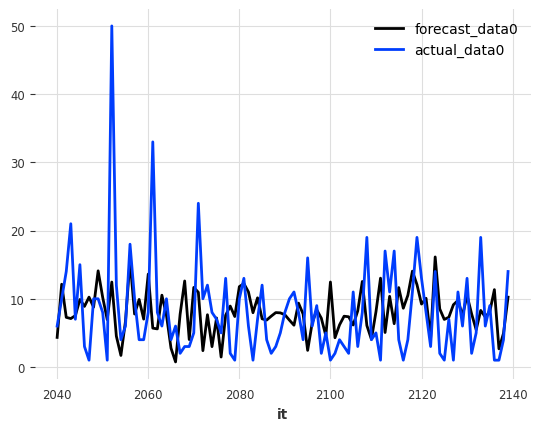

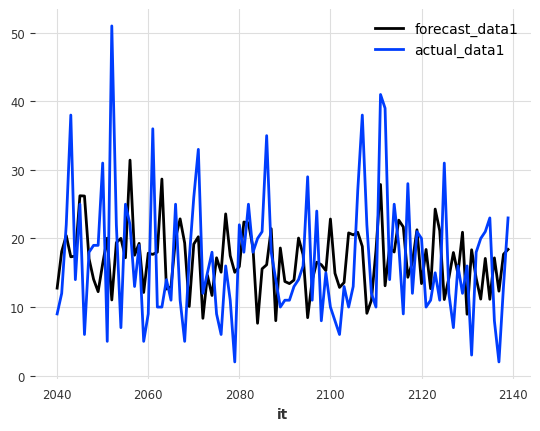

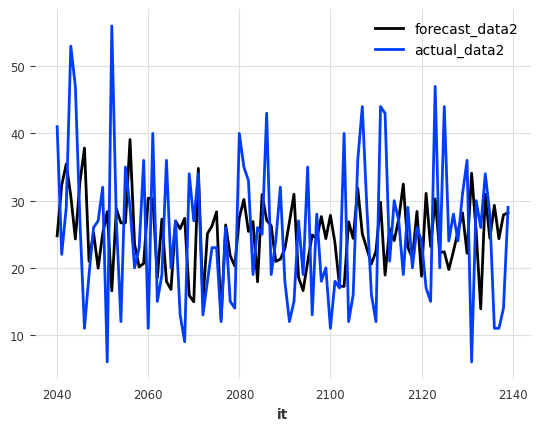

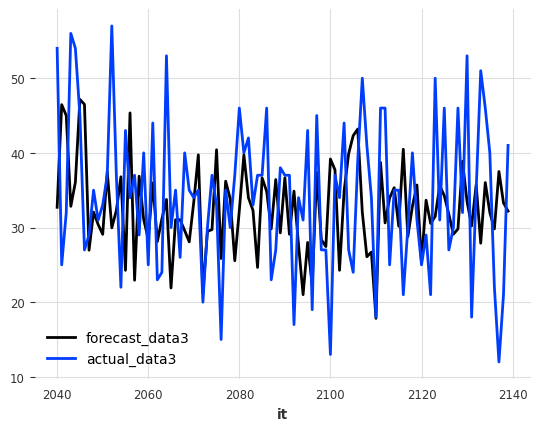

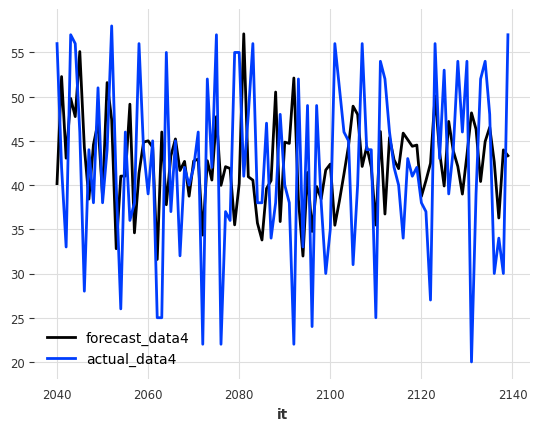

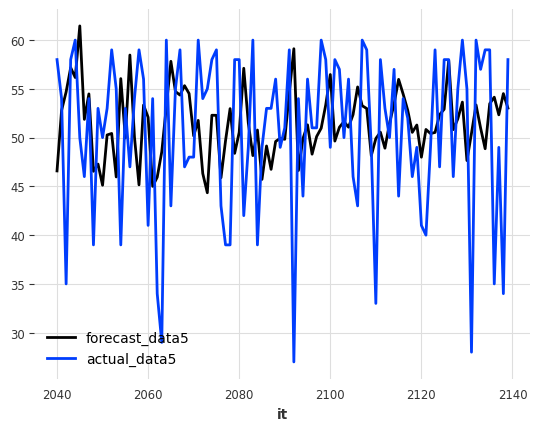

In [35]:
import numpy as np
import matplotlib.pyplot as plt
        

forecast_series = model.predict(n=100)
forecast_series = scaler.inverse_transform(forecast_series)
actual_series = val[:100]

print('Error Mean:\n', (actual_series - forecast_series).pd_dataframe().abs().mean())

for forecast_component, actual_component in zip(
    forecast_series.components, actual_series.components
):
    forecast_series[forecast_component].plot(label=f'forecast_{forecast_component}')
    actual_series[actual_component].plot(label=f'actual_{actual_component}')
    plt.show()